## Final Project Submission

Please fill out:
* Student name: Lauren Esser
* Student pace: Full time
* Scheduled project review date/time: Tuesday, Sept 8 at 4:30 pm
* Instructor name: James Irving
* Blog post URL: https://lauren-esser.github.io/osemn_is_awesome


# Introduction

> In this notebook, I am taking a look at the King County House Sales Dataset with the goal of predicting future sale prices of homes. The main question I have kept in mind during this project is "What can individuals do to increase their home's value?"


**Is that long enough**
**NEED to WRITE MY OWN READ ME

Include:
- 3 meaningful questions(don't need to present these to non-techincal audience. Just for notebook)
- 4 meaningful data visualizations with coreesponding interpretations (make sure to label, title, and legened (when appropriate)


# Tableau Price Visualizations

### Price vs. Location

> Simply by looking at this tableau visualizations, we can see that more of the expensive households are in the northeast region.

In [1]:
%%html
<div class='tableauPlaceholder' id='viz1598550555604' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Pricevs_Location&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Pricevs_Location&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Pricevs_Location&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598550555604');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Price vs. Zipcode

> Looking at price vs. zipcode we are able to see that it matches with the above tableau. The more expensive houses are in the north/northeast area of King County.

In [2]:
%%html
<div class='tableauPlaceholder' id='viz1598550849044' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Pricevs_Location&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;Pricevs_Location&#47;Sheet2?:language=en&amp;:embed=y&amp;:display_count=y&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Pricevs_Location&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598550849044');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Location vs. Yearbuilt

> I wanted to take a look at where the newer houses were being built in King County. Looking at the tableau below we can see that most new houses are going up northeast of the city as well. This leads me to believe that the new homes are selling for more.

In [3]:
%%html
<div class='tableauPlaceholder' id='viz1598550894188' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Yr&#47;YrBuiltvs_Location&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='YrBuiltvs_Location&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Yr&#47;YrBuiltvs_Location&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598550894188');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Obtain Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf


/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


>Here I imported the dataframe and set options to display maximum rows.

In [5]:
df = pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns', 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Check for Duplicates

> Below I checked for duplicates in the dataframe using the id column: 

> **177 duplicates**

> Reasoning for this could be if a specific house sold more than one time over the data collection period. I chose to drop the duplicates for the id column in order to represent each house only once. By using keep = first I chose to keep the first occurring id only and drop any after that.

In [6]:
#Check for duplicates
duplicates = df[df.duplicated(subset = 'id')]
print(len(duplicates))
duplicates.head()

177


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,3,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,5,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [7]:
#Drop duplicates using id column.
df.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 

In [8]:
#Recheck for duplicates
duplicates = df[df.duplicated(subset = 'id')]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [9]:
#check len/val
df.id.sort_values()

2494        1000102
6729        1200019
8404        1200021
8800        2800031
3553        3600057
            ...    
16723    9842300095
3257     9842300485
7614     9842300540
20963    9895000040
15937    9900000190
Name: id, Length: 21420, dtype: int64

In [10]:
#drop id since it is no longer needed
df.drop(['id'], axis=1, inplace=True)

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21420 non-null  object 
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     19067 non-null  float64
 8   view           21357 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  object 
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   17616 non-null  float64
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqft_l

### Observations

> - **D-Types**:
    - float64 = 8
    - int64 = 10
    - object = 2 (Need to switch sqft_basement over to float)
- **Missing Data**:
    - waterfront
    - view
    - yr_renovated

# Scrub

### Check for labeled categorical columns

In [13]:
cat_cols = df.select_dtypes('object')
cat_cols

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


In [14]:
#while at it create numerical columns list
num_cols = list(df.select_dtypes('number').columns)
num_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

> Above shows that there are only two labeled as an object or categorical column: **data and sqft_basement**. Since sqft_basement is *numerical* I am going to convert it to a float below.

In [15]:
#Look at val_counts for sqft_basement
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0       0.593697
?         0.021102
600.0     0.010084
500.0     0.009617
700.0     0.009570
            ...   
266.0     0.000047
172.0     0.000047
1275.0    0.000047
2196.0    0.000047
915.0     0.000047
Name: sqft_basement, Length: 304, dtype: float64

In [16]:
#replace ? with 0.0
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

> Here I am assuming that a 
**?** means there is no basement present therefore I switched all question marks over to *0.0* in the data.

In [17]:
#Recheck val_counts
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0       0.614799
600.0     0.010084
500.0     0.009617
700.0     0.009570
800.0     0.009384
            ...   
266.0     0.000047
172.0     0.000047
1275.0    0.000047
2196.0    0.000047
915.0     0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [18]:
#Save and convert to float
df.sqft_basement = df.sqft_basement.astype('float')

### Examine Nulls

In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,285.904342,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,440.008202,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


> Installed missingno for first time use. This allows for visualization of the null values before getting started. I can already see that waterfront and yr_renovated will have a high number of nulls.

In [20]:
#conda install -c conda-forge/label/gcc7 missingno

<AxesSubplot:>

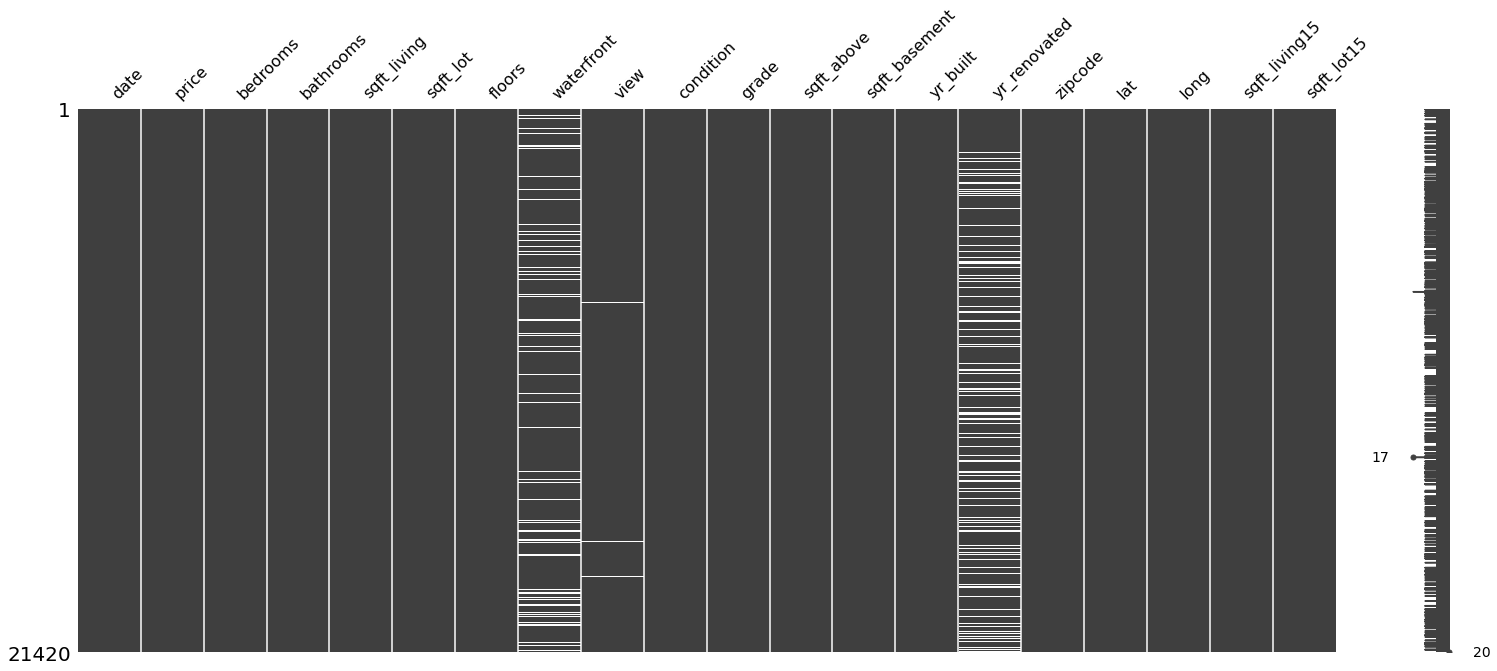

In [21]:
import missingno as ms
ms.matrix(df)

> Below I looked to see if there are any rows with over two nulls. Since more information is missing I chose to drop those rows. 

In [22]:
# number of rows missing data
df.isna().sum(axis=1).value_counts()

0    15644
1     5334
2      440
3        2
dtype: int64

In [23]:
#Keep rows w/ less than 3 Null
keep_rows = df.isna().sum(axis=1) < 3

In [24]:
df = df[keep_rows]

In [25]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2351
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3802
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

> **Observations**: 
- Three columns with Null values: *waterfront, view, and yr_renovated*. I will go through each of the columns below.

### Waterfront

In [26]:
#Check majority
df.waterfront.value_counts()

0.0    18921
1.0      146
Name: waterfront, dtype: int64

In [27]:
#Fill NaN with 0.0, assume no waterfront
df['waterfront'] = df['waterfront'].fillna(0.0)

In [28]:
#NaN check
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3802
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### View

In [29]:
#less than 5% consider dropping
df.view.value_counts(dropna = False, normalize = True)

0.0    0.898917
2.0    0.044635
3.0    0.023578
1.0    0.015361
4.0    0.014661
NaN    0.002848
Name: view, dtype: float64

In [30]:
# .2% deciding to drop NaN views
df.dropna(subset = ['view'], inplace=True)

In [31]:
df.view.isna().sum()

0

### Yr_renovated

In [32]:
#Assume NaN = no reno & replace with 0
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [33]:
#Check NaN
df.yr_renovated.isna().sum()

0

### Check for abnormal symbols or characters

In [34]:
#Check for abnormal symbols etc.
for col in df.columns:
    try: 
        print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')
    except:
        (print(col, df[col].value_counts()))

date 
 6/23/2014    0.006649
6/26/2014    0.006134
6/25/2014    0.006134
7/8/2014     0.005947
4/27/2015    0.005806
Name: date, dtype: float64 


price 
 350000.0    0.008007
450000.0    0.007960
550000.0    0.007304
500000.0    0.007070
425000.0    0.007023
Name: price, dtype: float64 


bedrooms 
 3    0.454090
4    0.319895
2    0.127827
5    0.074027
6    0.012314
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249988
1.00    0.177178
1.75    0.140797
2.25    0.094629
2.00    0.089385
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006368
1440    0.006227
1400    0.006134
1800    0.005993
1660    0.005993
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016575
6000    0.013391
4000    0.011659
7200    0.010207
7500    0.005478
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492672
2.0    0.382966
1.5    0.088074
3.0    0.028515
2.5    0.007445
Name: floors, dtype: float64 


waterfront 
 0.0    0.993211
1.0    0.006789
Name: waterfront, dtype: float

> In the scrub section I took care of null values, converted an object column to float, and checked for abnormal characters or symbols. 

# Explore

> Below I set the color palette for all of my visualizations.

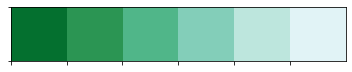

In [35]:
sns.palplot(sns.color_palette("BuGn_r"))

In [36]:
sns.set_palette("BuGn_r")

> Here I examining the target column of price.

<AxesSubplot:xlabel='price'>

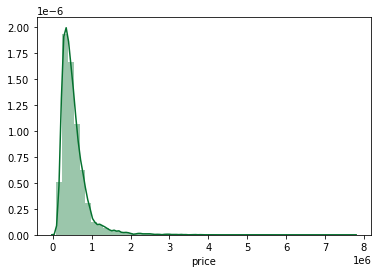

In [37]:
#examine target
target = 'price'
sns.distplot(df[target])

> Displot looks like a slight left skew.

<AxesSubplot:ylabel='price'>

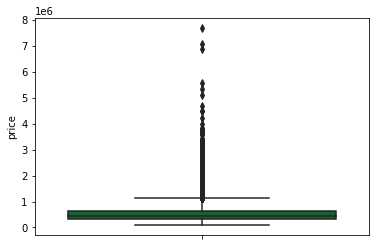

In [38]:
sns.boxplot(y= df[target])

> Boxplot shows outliers on the high price end.

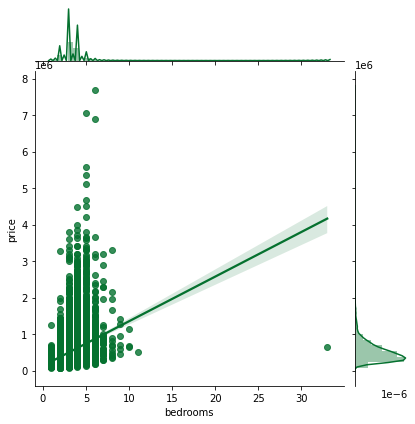

In [39]:
sns.jointplot(data=df, x = 'bedrooms', y=target,  kind = 'reg')

> Set up a joint plot to compare dependent and independent variables.

> Below is based off of in class lesson to make sorting through graphs of columns easier using interact. 

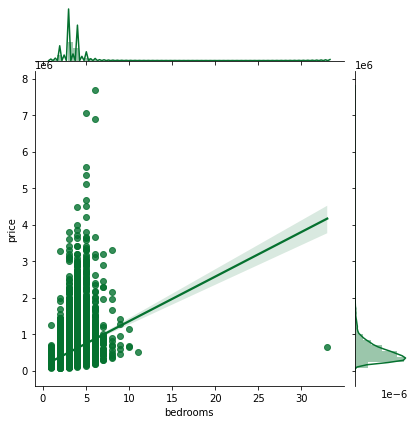

In [40]:
joint = sns.jointplot(data=df, x = 'bedrooms', y=target,  kind = 'reg')
fig = joint.fig
ax = fig.get_axes()

In [41]:
def joint_graphs(df, col, target = 'price'):
    
    sns.set(rc={'axes.labelsize': 14})
    sns.color_palette("BuGn_r")        
    joint = sns.jointplot(data = df, x = col, y=target,
                          kind='reg', height = 7,
                          color = 'g')
    plt.suptitle(f" Comparing {col} and {target}", fontsize = 14)
    return joint
    

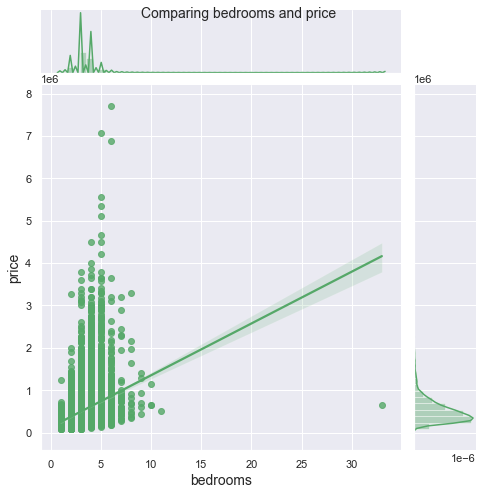

In [42]:
joint_graphs(df, 'bedrooms')

In [43]:
from ipywidgets import interact

In [44]:
@interact 
def show_plot(col=num_cols):
    joint_graphs(df, col)

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

### Ordinal Categorical Data

> Below I decided to make **zipcode** and **condition** categorical data. Using get_dummies I one-hot encoded those columns.

In [45]:
#Use Dummy encoding/One-Hot Encoding
df_ohe = pd.get_dummies(df, columns=['zipcode', 'condition'], drop_first=True)

In [46]:
df_ohe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,...,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,condition_2,condition_3,condition_4,condition_5
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### First R-squared Model

> Drop price since it is the target column and date since it is not being used.

In [47]:
features = '+'.join(df_ohe.drop(columns=['price', 'date']).columns)
features

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+grade+sqft_above+sqft_basement+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_9

In [48]:
formula = target + '~' + features
model = smf.ols(formula, df_ohe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1012.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:39:16   Log-Likelihood:            -2.8625e+05
No. Observations:               21357   AIC:                         5.727e+05
Df Residuals:                   21267   BIC:                         5.734e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.536e+07   6.16e+06     -4.116      0.000   -3.74e+07   -1.33e+07
bedrooms      -2.712e+04   1547.821    -17.521      0.000   -3.02e+04   -2.41e+04
bathrooms      2.305e+04   2647.551      8.705      0.000    1.79e+04    2.82e+04
sqft_living     101.1149     14.456      6.995      0.000      72.779     129.450
sqft_lot          0.2369      0.038      6.160      0.000       0.162       0.312
floors        -4.476e+04   3172.617    -14.108      0.000    -5.1e+04   -3.85e+04
waterfront     6.638e+05   1.48e+04     44.950      0.000    6.35e+05    6.93e+05
view           5.827e+04   1748.167     33.334      0.000    5.48e+04    6.17e+04
grade          5.833e+04   1834.631     31.796      0.000    5.47e+04    6.19e+04
sqft_above      106.8461     14.483      7.377      0.000      78.459     135.233
sqft_basement    27.8622     14.311      1.947      0.052      -0.189      55.913
yr_built       -705.9135     65.138    -10.837      0.000    -833.589    -578.238
yr_renovated     20.1941      3.218      6.275      0.000      13.886      26.502
lat            1.968e+05   6.37e+04      3.087      0.002    7.18e+04    3.22e+05
long          -1.385e+05   4.57e+04     -3.034      0.002   -2.28e+05   -4.91e+04
sqft_living15     9.5583      2.901      3.295      0.001       3.872      15.245
sqft_lot15       -0.1294      0.061     -2.137      0.033      -0.248      -0.011
zipcode_98002  3.527e+04   1.45e+04      2.425      0.015    6766.730    6.38e+04
zipcode_98003  -2.38e+04    1.3e+04     -1.827      0.068   -4.93e+04    1726.633
zipcode_98004  7.234e+05   2.36e+04     30.618      0.000    6.77e+05     7.7e+05
zipcode_98005   2.55e+05   2.52e+04     10.110      0.000    2.06e+05    3.04e+05
zipcode_98006  2.318e+05   2.07e+04     11.223      0.000    1.91e+05    2.72e+05
zipcode_98007  2.018e+05   2.61e+04      7.736      0.000    1.51e+05    2.53e+05
zipcode_98008  2.104e+05   2.47e+04      8.511      0.000    1.62e+05    2.59e+05
zipcode_98010  1.012e+05   2.21e+04      4.570      0.000    5.78e+04    1.45e+05
zipcode_98011  4.249e+04   3.22e+04      1.320      0.187   -2.06e+04    1.06e+05
zipcode_98014  8.637e+04   3.53e+04      2.443      0.015    1.71e+04    1.56e+05
zipcode_98019  4.955e+04   3.48e+04      1.423      0.155   -1.87e+04    1.18e+05
zipcode_98022  3.982e+04   1.92e+04      2.070      0.038    2116.194    7.75e+04
zipcode_98023 -4.776e+04    1.2e+04     -3.981      0.000   -7.13e+04   -2.42e+04
zipcode_98024  1.554e+05   3.12e+04      4.989      0.000    9.44e+04    2.17e+05
zipcode_98027  1.568e+05   2.12e+04      7.408      0.000    1.15e+05    1.98e+05
zipcode_98028  3.521e+04   3.13e+04      1.126      0.260   -2.61e+04    9.65e+04
zipcode_98029  1.971e+05   2.42e+04      8.152      0.000     1.5e+05    2.44e+05
zipcode_98030  3664.1999   1.43e+04      0.256   

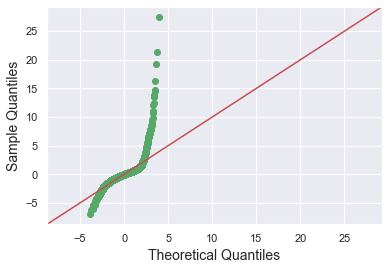

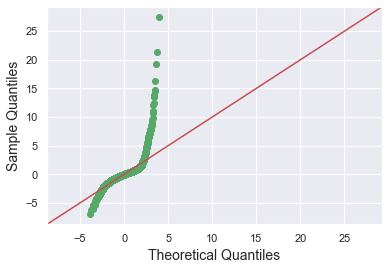

In [49]:
sm.graphics.qqplot(model.resid, fit=True, 
                       line= '45', color = 'g')

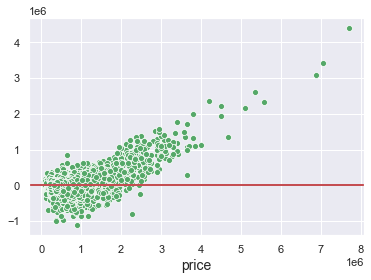

In [50]:
ax = sns.scatterplot(df_ohe[target], model.resid, color = 'g')
ax.axhline(linewidth=2, color='r')

> Create function to make it quicker to graph visualizations for model.

In [51]:
def create_visuals(y_true):
    fig, axes = plt.subplots(ncols=2, figsize=(10,6))
    
    sm.graphics.qqplot(model.resid, fit=True, 
                       line= '45', color = 'g', ax=axes[0])
   
    ax = axes[1]
    ax = sns.scatterplot(y_true, model.resid, color = 'g')
    ax.axhline(linewidth=2, color='r')
    plt.suptitle(f" QQplot and Homoskedasticity Check", fontsize = 14)

    

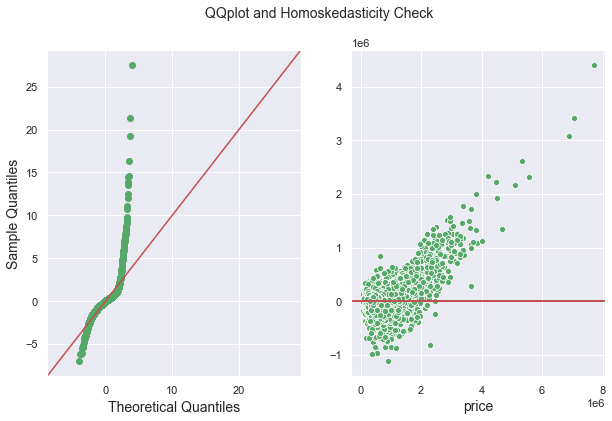

In [52]:
create_visuals(df_ohe[target])

>**Observations**:
- Higher R-squared of .809. First R-squared was .700. Went back and decided to scrub data better.
- Problem P-value rows
- Multicolinearity of 2.84e+08

### Dealing with P-Values

In [53]:
p_val = round(model.pvalues.sort_values(ascending=True), 3)

In [54]:
p_val

waterfront       0.000
zipcode_98039    0.000
view             0.000
grade            0.000
zipcode_98004    0.000
                 ...  
zipcode_98031    0.612
zipcode_98032    0.614
zipcode_98188    0.642
zipcode_98030    0.798
zipcode_98178    0.898
Length: 90, dtype: float64

In [55]:
p_removal = list(p_val[p_val > .05].index)

In [56]:
p_removal

['sqft_basement',
 'zipcode_98003',
 'zipcode_98155',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98198',
 'zipcode_98055',
 'zipcode_98019',
 'zipcode_98011',
 'zipcode_98148',
 'zipcode_98028',
 'zipcode_98042',
 'zipcode_98058',
 'zipcode_98166',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98188',
 'zipcode_98030',
 'zipcode_98178']

> Above I am checking to see if 'Intercept' is listed in the p_removal list. It is not so I can proceed.

In [57]:
# % of overall data to drop
len(p_removal)/len(df_ohe.columns)

0.2087912087912088

In [58]:
for col in p_removal:
    if col in df_ohe.columns:
        df_ohe.drop(columns=col, inplace = True)

In [59]:
features = '+'.join(df_ohe.drop(columns=['price', 'date']).columns)


In [60]:
formula = target + '~' + features
model = smf.ols(formula, df_ohe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1286.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:39:19   Log-Likelihood:            -2.8627e+05
No. Observations:               21357   AIC:                         5.727e+05
Df Residuals:                   21286   BIC:                         5.732e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.601e+07   2.89e+06     -8.992      0.000   -3.17e+07   -2.03e+07
bedrooms      -2.712e+04   1547.075    -17.530      0.000   -3.02e+04   -2.41e+04
bathrooms      2.314e+04   2645.260      8.748      0.000     1.8e+04    2.83e+04
sqft_living     128.1656      3.563     35.976      0.000     121.183     135.148
sqft_lot          0.2401      0.038      6.243      0.000       0.165       0.316
floors        -4.461e+04   3166.795    -14.088      0.000   -5.08e+04   -3.84e+04
waterfront     6.649e+05   1.48e+04     45.072      0.000    6.36e+05    6.94e+05
view           5.797e+04   1738.985     33.334      0.000    5.46e+04    6.14e+04
grade          5.824e+04   1828.118     31.857      0.000    5.47e+04    6.18e+04
sqft_above       79.9257      3.643     21.942      0.000      72.786      87.065
yr_built       -707.7043     64.715    -10.936      0.000    -834.551    -580.857
yr_renovated     20.2542      3.216      6.298      0.000      13.951      26.558
lat            3.197e+05   1.34e+04     23.856      0.000    2.93e+05    3.46e+05
long          -9.621e+04   2.24e+04     -4.290      0.000    -1.4e+05   -5.23e+04
sqft_living15     9.5898      2.884      3.325      0.001       3.936      15.243
sqft_lot15       -0.1414      0.060     -2.346      0.019      -0.260      -0.023
zipcode_98002  4.202e+04   1.19e+04      3.521      0.000    1.86e+04    6.54e+04
zipcode_98004  6.925e+05   9675.965     71.568      0.000    6.74e+05    7.11e+05
zipcode_98005  2.227e+05   1.29e+04     17.315      0.000    1.98e+05    2.48e+05
zipcode_98006  2.053e+05   8040.754     25.537      0.000     1.9e+05    2.21e+05
zipcode_98007  1.685e+05    1.4e+04     11.998      0.000    1.41e+05    1.96e+05
zipcode_98008  1.761e+05   1.03e+04     17.171      0.000    1.56e+05    1.96e+05
zipcode_98010  9.615e+04   1.71e+04      5.608      0.000    6.25e+04     1.3e+05
zipcode_98014   3.37e+04   1.69e+04      1.994      0.046     575.499    6.68e+04
zipcode_98022  4.984e+04   1.26e+04      3.957      0.000    2.52e+04    7.45e+04
zipcode_98023 -3.439e+04   8572.714     -4.012      0.000   -5.12e+04   -1.76e+04
zipcode_98024  1.192e+05   1.96e+04      6.071      0.000    8.07e+04    1.58e+05
zipcode_98027  1.304e+05   9089.484     14.345      0.000    1.13e+05    1.48e+05
zipcode_98029  1.642e+05   1.04e+04     15.761      0.000    1.44e+05    1.85e+05
zipcode_98033  2.624e+05   8518.595     30.803      0.000    2.46e+05    2.79e+05
zipcode_98034  8.509e+04   7934.387     10.724      0.000    6.95e+04    1.01e+05
zipcode_98038  4.329e+04   8259.885      5.241      0.000    2.71e+04    5.95e+04
zipcode_98039  1.238e+06   2.34e+04     52.995      0.000    1.19e+06    1.28e+06
zipcode_98040   4.36e+05   1.02e+04     42.677      0.000    4.16e+05    4.56e+05
zipcode_98045  9.365e+04    1.5e+04      6.249   

>**Observations**:
- R-squared did not change .809
- P-values taken care of
- Multicolinearity dropped to 1.33e+.08

### SCRUB: Check for multicollinearity

In [61]:
df_ohe.shape

(21357, 72)

In [62]:
df_ohe.iloc[:, 2:72]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98014,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199,condition_2,condition_3,condition_4,condition_5
0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,1955,0.0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,1951,1991.0,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,0.0,0.0,6,770,1933,0.0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,1965,0.0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,1987,0.0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.0,0.0,8,1530,2009,0.0,47.6993,-122.346,1530,1509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21593,4,2.50,2310,5813,2.0,0.0,0.0,8,2310,2014,0.0,47.5107,-122.362,1830,7200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
21594,2,0.75,1020,1350,2.0,0.0,0.0,7,1020,2009,0.0,47.5944,-122.299,1020,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
21595,3,2.50,1600,2388,2.0,0.0,0.0,8,1600,2004,0.0,47.5345,-122.069,1410,1287,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


> Take a copy of the data without the target variable of "price". Also dropped "date" because keeping it in won't lead to meaningful results.

In [63]:
data_pred = df_ohe.iloc[:, 2:72]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98014,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199,condition_2,condition_3,condition_4,condition_5
0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,1955,0.0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,1951,1991.0,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,0.0,0.0,6,770,1933,0.0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,1965,0.0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,1987,0.0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


> Creating a correlation matrix. Negative numbers represent negative linear relationships whereas positive numbers represent a positive linear relationship.

In [64]:
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98014,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199,condition_2,condition_3,condition_4,condition_5
bedrooms,1.000000,0.515245,0.578790,0.032756,0.177177,-0.003819,0.078523,0.357521,0.480005,0.155031,0.017365,-0.011738,0.132707,0.394417,0.030834,-0.006158,0.063737,0.045932,0.078208,0.039665,0.045226,-0.006707,-0.031408,-0.024266,0.009342,-0.001808,0.024206,0.007241,0.028746,0.015438,0.012755,0.036677,0.080965,-0.014841,0.043928,-0.021351,0.007869,0.056225,0.022794,-0.047055,0.009544,0.040438,0.068249,-0.009357,-0.056964,0.023285,-0.037060,-0.045184,-0.017007,-0.014017,0.015572,-0.031054,-0.041710,-0.061382,-0.039435,-0.011374,-0.025727,-0.024450,-0.075287,-0.039998,-0.053602,-0.022839,-0.030984,-0.045097,0.002540,-0.021716,-0.049304,0.005079,-0.009628,0.026836
bathrooms,0.515245,1.000000,0.755037,0.088328,0.501502,0.061110,0.185383,0.665055,0.685830,0.506644,0.047463,0.023346,0.223928,0.568701,0.088313,-0.035259,0.065873,0.035439,0.087148,0.006672,-0.004522,-0.008939,-0.007291,-0.027309,-0.011518,0.006083,0.064987,0.074312,0.040198,0.001065,0.056200,0.070315,0.088552,0.000276,0.053620,0.062468,-0.013783,0.044256,0.068184,-0.019258,0.018029,0.072627,0.105094,0.015053,-0.041109,0.005565,-0.049803,-0.010472,-0.023109,0.003723,0.036835,-0.055083,-0.020941,-0.064305,-0.069671,0.012845,-0.007570,-0.052406,-0.073352,-0.074971,-0.037241,-0.012448,-0.070523,-0.098565,-0.002780,0.008331,-0.074046,0.192481,-0.168274,-0.036391
sqft_living,0.578790,0.755037,1.000000,0.172899,0.352438,0.102075,0.281658,0.762092,0.876640,0.316707,0.050660,0.050961,0.240855,0.755991,0.184296,-0.047841,0.110718,0.055684,0.133898,0.009528,0.006412,0.003174,0.002981,-0.027841,-0.014425,0.020053,0.065290,0.026696,0.046382,-0.018469,0.012522,0.092497,0.127142,-0.001370,0.051276,0.081078,-0.010651,0.053249,0.065594,-0.014633,0.035569,0.089653,0.133264,0.005212,-0.079729,0.007703,-0.080695,-0.061077,-0.038391,-0.002174,0.050529,-0.045242,-0.031837,-0.068827,-0.064430,-0.007821,-0.037551,-0.049754,-0.075512,-0.077852,-0.043948,-0.024796,-0.057013,-0.073773,0.028961,0.010901,-0.062046,0.103283,-0.084950,-0.019755
sqft_lot,0.032756,0.088328,0.172899,1.000000,-0.005775,0.021436,0.075605,0.114046,0.183393,0.052009,0.005104,-0.085451,0.230175,0.144182,0.716629,-0.017694,-0.005952,0.010320,-0.006231,-0.008621,-0.013769,0.063961,0.151116,0.149983,-0.017212,0.130390,0.060584,-0.019107,-0.015947,-0.020819,0.041882,0.002859,-0.004006,0.086805,-0.015976,0.065377,-0.018376,-0.002524,0.006263,0.145110,0.043185,-0.001820,0.012267,-0.019409,-0.047627,-0.025083,-0.028935,-0.032141,-0.022305,-0.019845,-0.027461,-0.038663,-0.030514,-0.040996,-0.034684,-0.025843,-0.032731,-0.024722,-0.031218,-0.029424,-0.024455,-0.033719,-0.016963,-0.010078,-0.008389,-0.028546,0.039092,-0.011808,0.013178,-0.014100
floors,0.177177,0.501502,0.352438,-0.005775,1.000000,0.020137,0.027193,0.457988,0.522122,0.489153,0.002659,0.049078,0.124190,0.278137,-0.011497,-0.029210,-0.014223,-0.035647,-0.009593,-0.012878,-0.067369,-0.002687,0.000561,-0.033094,-0.047890,-0.006738,0.044402,0.103650,-0.000175,-0.053324,0.075439,0.006694,0.001611,0.001611,0.026228,0.042627,-0.017181,0.037329,0.085401,-0.011249,-0.005761,0.058500,0.076243,0

> Take a look to see how many highly correlated variables we have. I set the cut-off as .75. Where it states true leads me to believe there is high correlation.

In [65]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98014,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199,condition_2,condition_3,condition_4,condition_5
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98199,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
condition_2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

> Creating a heatmap to show the correlation matrix as a visualization. The lighter the number the higher the correlation.

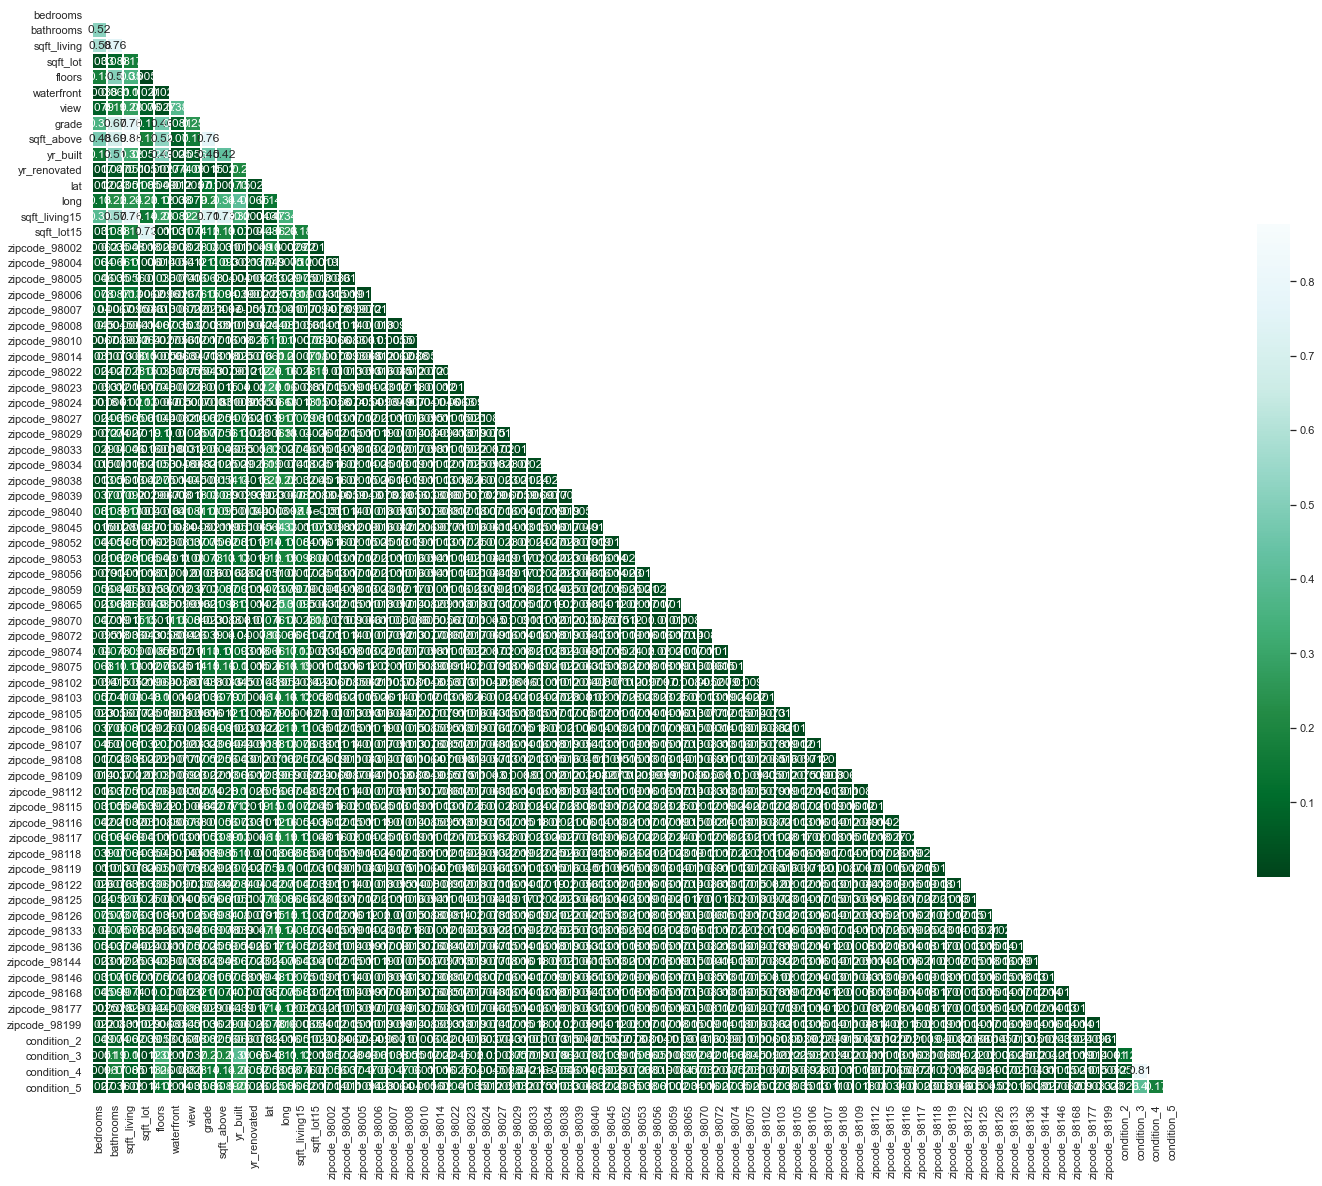

In [66]:
corr = data_pred.corr().abs()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 20))
    ax = sns.heatmap(corr, mask=mask, annot = True, linewidths=1, 
                     square=True, cbar_kws={'shrink':0.6}, 
                     cmap="BuGn_r")

> Below I calculated multicolinarity using the module method and what was shown in class. Based on results and discussing with instructor I chose to go with vif.

In [67]:
# # save absolute value of correlation matrix as a data frame
# # converts all values to absolute value
# # stacks the row:column pairs into a multindex
# # reset the index to set the multindex to seperate columns
# # sort values. 0 is the column automatically generated by the stacking

# df1 = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# #zip new columns into pairs
# df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# #set index to pairs
# df1.set_index(['pairs'], inplace=True)

# #drop level columns
# df1.drop(columns=['level_1', 'level_0'], inplace=True)

# #rename from 0 to cc
# df1.columns = ['cc']
# df1.drop_duplicates(inplace=True)

In [68]:
#df1[(df1.cc>.75) & (df1.cc< 1)]

> **Observation from Module Method**:
- sqft_living has high correlation with sqft_above, grade, sqft_living15, and bathrooms.
- Condition 3 and 4
- Grade with sqft_above



>- Went through and dropped columns and the multicollinearity did not change. Readding to data set.

### Testing with VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
df_ohe = df_ohe.drop('date', axis=1)

In [71]:
X = df_ohe.drop('price', axis=1)
X = sm.add_constant(X)
X.shape

(21357, 71)

In [72]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [73]:
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results

const            6.926693e+06
bedrooms         1.697360e+00
bathrooms        3.419968e+00
sqft_living      8.858012e+00
sqft_lot         2.109229e+00
                     ...     
zipcode_98199    1.354231e+00
condition_2      6.770880e+00
condition_3      1.761646e+02
condition_4      1.500519e+02
condition_5      5.682283e+01
Length: 71, dtype: float64

In [74]:
threshold = 6
bad_vif = list(vif_results[vif_results>threshold].index)
if 'const' in bad_vif:
    bad_vif.remove('const') 
bad_vif

['sqft_living',
 'sqft_above',
 'long',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5']

In [75]:
for col in bad_vif:
    if col in df_ohe.columns:
        df_ohe.drop(columns=col, inplace = True)

In [76]:
features = '+'.join(df_ohe.drop(columns= 'price').columns)
features

'bedrooms+bathrooms+sqft_lot+floors+waterfront+view+grade+yr_built+yr_renovated+lat+sqft_living15+sqft_lot15+zipcode_98002+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98014+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98029+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98056+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98168+zipcode_98177+zipcode_98199'

In [77]:
formula = target + '~' + features
model = smf.ols(formula, df_ohe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1095.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:40:03   Log-Likelihood:            -2.8851e+05
No. Observations:               21357   AIC:                         5.771e+05
Df Residuals:                   21293   BIC:                         5.777e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.123e+07   7.19e+05    -15.624      0.000   -1.26e+07   -9.82e+06
bedrooms       6772.1106   1615.523      4.192      0.000    3605.564    9938.658
bathrooms      9.326e+04   2612.658     35.697      0.000    8.81e+04    9.84e+04
sqft_lot          0.3785      0.043      8.890      0.000       0.295       0.462
floors        -1.324e+04   3072.369     -4.310      0.000   -1.93e+04   -7218.653
waterfront      7.01e+05   1.64e+04     42.832      0.000    6.69e+05    7.33e+05
view           5.945e+04   1896.268     31.352      0.000    5.57e+04    6.32e+04
grade          1.114e+05   1832.787     60.768      0.000    1.08e+05    1.15e+05
yr_built      -1920.7053     65.725    -29.223      0.000   -2049.531   -1791.880
yr_renovated     10.1953      3.512      2.903      0.004       3.312      17.079
lat            2.987e+05   1.48e+04     20.244      0.000     2.7e+05    3.28e+05
sqft_living15    80.0719      2.959     27.059      0.000      74.272      85.872
sqft_lot15        0.0376      0.067      0.564      0.573      -0.093       0.168
zipcode_98002  6.625e+04   1.32e+04      5.007      0.000    4.03e+04    9.22e+04
zipcode_98004  6.958e+05   1.07e+04     64.861      0.000    6.75e+05    7.17e+05
zipcode_98005  1.999e+05   1.42e+04     14.049      0.000    1.72e+05    2.28e+05
zipcode_98006  1.857e+05   8749.670     21.222      0.000    1.69e+05    2.03e+05
zipcode_98007  1.355e+05   1.55e+04      8.755      0.000    1.05e+05    1.66e+05
zipcode_98008  1.547e+05   1.11e+04     13.918      0.000    1.33e+05    1.76e+05
zipcode_98010  1.098e+05   1.83e+04      5.994      0.000    7.39e+04    1.46e+05
zipcode_98014  3.024e+04   1.68e+04      1.795      0.073   -2774.844    6.32e+04
zipcode_98022  3.456e+04   1.28e+04      2.695      0.007    9421.185    5.97e+04
zipcode_98023 -3.159e+04   8836.464     -3.575      0.000   -4.89e+04   -1.43e+04
zipcode_98024  1.138e+05   2.06e+04      5.514      0.000    7.34e+04    1.54e+05
zipcode_98027  1.052e+05   9273.402     11.345      0.000     8.7e+04    1.23e+05
zipcode_98029  1.129e+05   1.05e+04     10.788      0.000    9.24e+04    1.33e+05
zipcode_98033  2.645e+05   9439.467     28.019      0.000    2.46e+05    2.83e+05
zipcode_98034  7.564e+04   8805.417      8.590      0.000    5.84e+04    9.29e+04
zipcode_98038  2.914e+04   8059.555      3.616      0.000    1.33e+04    4.49e+04
zipcode_98039  1.293e+06   2.59e+04     49.926      0.000    1.24e+06    1.34e+06
zipcode_98040  4.245e+05   1.13e+04     37.640      0.000    4.02e+05    4.47e+05
zipcode_98045    6.2e+04   1.24e+04      5.000      0.000    3.77e+04    8.63e+04
zipcode_98052  1.091e+05   8460.052     12.897      0.000    9.25e+04    1.26e+05
zipcode_98053  1.314e+05   9857.968     13.327      0.000    1.12e+05    1.51e+05
zipcode_98056  6.885e+04   9262.709      7.433   

> **Observations**:
- R-squared dropped to .764
- P-values sqft_lot15 over, zipcode_98014, 98070
- Multicolinearity dropped to 2.98e+07

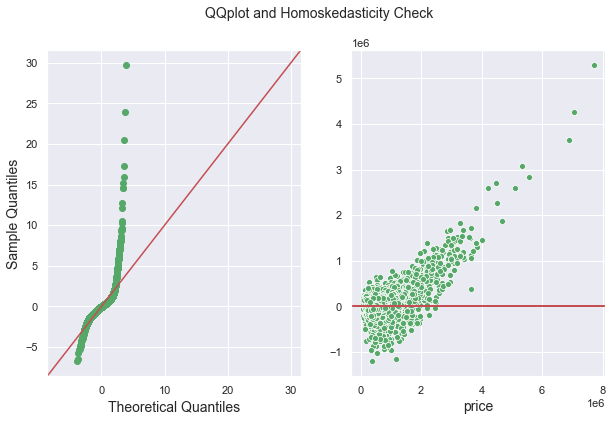

In [78]:
create_visuals(df_ohe[target])

In [79]:
def p_val_removal(df):
    p_val = round(model.pvalues.sort_values(ascending=True), 3)
    p_removal = list(p_val[p_val > .05].index)
    len(p_removal)/len(df_ohe.columns)
    for col in p_removal:
        if col in df.columns:
            df.drop(columns=col, inplace = True)

In [80]:
p_val_removal(df_ohe)

In [81]:
df_ohe.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,sqft_living15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199
0,221900.0,3,1.00,5650,1.0,0.0,0.0,7,1955,0.0,47.5112,1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,7,1951,1991.0,47.7210,1690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,0.0,0.0,6,1933,0.0,47.7379,2720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,7,1965,0.0,47.5208,1360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,8080,1.0,0.0,0.0,8,1987,0.0,47.6168,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
features = '+'.join(df_ohe.drop(columns='price').columns)

In [83]:
formula = target + '~' + features
model = smf.ols(formula, df_ohe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1149.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:40:05   Log-Likelihood:            -2.8851e+05
No. Observations:               21357   AIC:                         5.771e+05
Df Residuals:                   21296   BIC:                         5.776e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.153e+07   7.07e+05    -16.296      0.000   -1.29e+07   -1.01e+07
bedrooms       6753.8124   1613.547      4.186      0.000    3591.139    9916.486
bathrooms      9.326e+04   2612.784     35.693      0.000    8.81e+04    9.84e+04
sqft_lot          0.3969      0.031     12.693      0.000       0.336       0.458
floors        -1.329e+04   3070.445     -4.328      0.000   -1.93e+04   -7269.284
waterfront     6.979e+05   1.62e+04     42.950      0.000    6.66e+05     7.3e+05
view           5.936e+04   1894.560     31.334      0.000    5.56e+04    6.31e+04
grade          1.113e+05   1831.984     60.764      0.000    1.08e+05    1.15e+05
yr_built      -1916.7617     65.701    -29.174      0.000   -2045.540   -1787.983
yr_renovated     10.2180      3.512      2.909      0.004       3.334      17.102
lat            3.048e+05   1.45e+04     20.991      0.000    2.76e+05    3.33e+05
sqft_living15    80.3180      2.945     27.272      0.000      74.545      86.091
zipcode_98002  6.709e+04   1.32e+04      5.074      0.000    4.12e+04     9.3e+04
zipcode_98004  6.948e+05   1.07e+04     64.870      0.000    6.74e+05    7.16e+05
zipcode_98005  1.989e+05   1.42e+04     13.993      0.000    1.71e+05    2.27e+05
zipcode_98006  1.849e+05   8732.209     21.178      0.000    1.68e+05    2.02e+05
zipcode_98007  1.345e+05   1.55e+04      8.694      0.000    1.04e+05    1.65e+05
zipcode_98008  1.537e+05   1.11e+04     13.861      0.000    1.32e+05    1.75e+05
zipcode_98010   1.11e+05   1.83e+04      6.073      0.000    7.52e+04    1.47e+05
zipcode_98022   3.64e+04   1.28e+04      2.854      0.004    1.14e+04    6.14e+04
zipcode_98023  -3.08e+04   8824.791     -3.491      0.000   -4.81e+04   -1.35e+04
zipcode_98024   1.14e+05   2.05e+04      5.553      0.000    7.38e+04    1.54e+05
zipcode_98027  1.049e+05   9244.609     11.349      0.000    8.68e+04    1.23e+05
zipcode_98029   1.12e+05   1.04e+04     10.723      0.000    9.15e+04    1.32e+05
zipcode_98033   2.63e+05   9403.030     27.972      0.000    2.45e+05    2.81e+05
zipcode_98034  7.393e+04   8754.139      8.445      0.000    5.68e+04    9.11e+04
zipcode_98038  2.955e+04   8044.152      3.674      0.000    1.38e+04    4.53e+04
zipcode_98039  1.292e+06   2.59e+04     49.896      0.000    1.24e+06    1.34e+06
zipcode_98040  4.239e+05   1.13e+04     37.627      0.000    4.02e+05    4.46e+05
zipcode_98045  6.189e+04   1.24e+04      5.002      0.000    3.76e+04    8.61e+04
zipcode_98052  1.076e+05   8418.078     12.779      0.000    9.11e+04    1.24e+05
zipcode_98053    1.3e+05   9807.037     13.256      0.000    1.11e+05    1.49e+05
zipcode_98056  6.839e+04   9247.115      7.395      0.000    5.03e+04    8.65e+04
zipcode_98059  5.737e+04   8703.069      6.592      0.000    4.03e+04    7.44e+04
zipcode_98065   5.49e+04   1.07e+04      5.132   

> **Observations**:
- R-squared still .764
- P-values  fixed
- Multicolinearity dropped to 2.56e+07

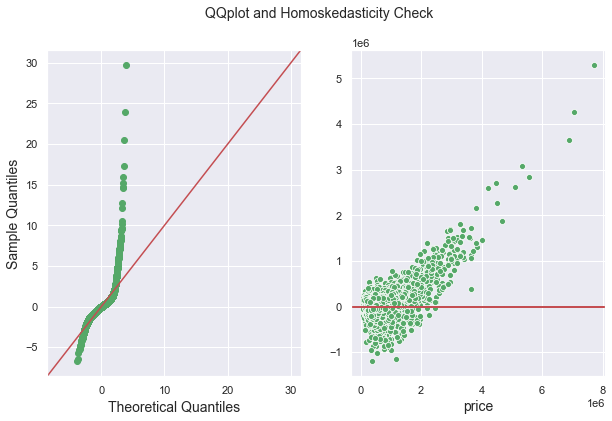

In [84]:
create_visuals(df_ohe[target])

## Question: Do outliers have an impact on R2?

### SCRUB: Check for normality and outliers

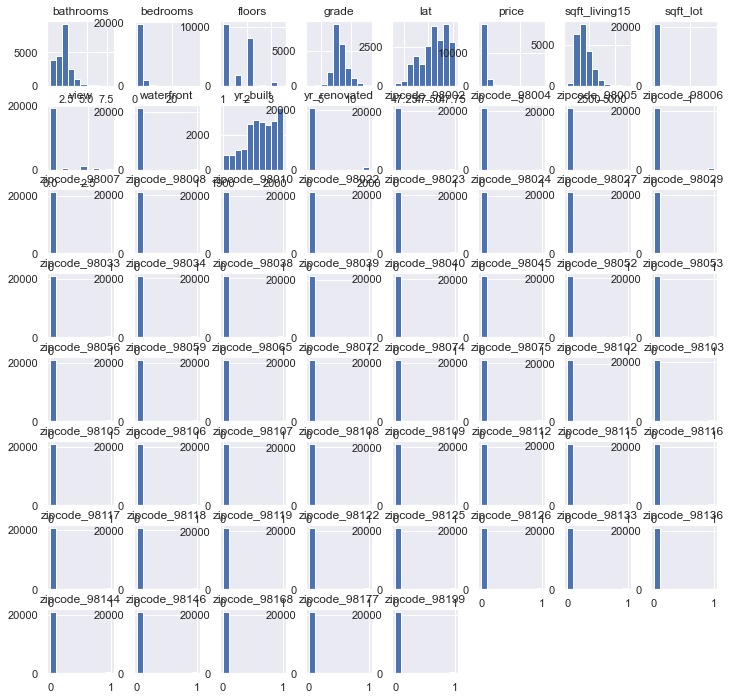

In [85]:
df_ohe.hist(figsize=(12,12));

### Using Z-score

In [86]:
import scipy.stats as stats

In [87]:
from scipy.stats import zscore
#convert to z-score
df_ohe_z = df_ohe.apply(zscore)

In [88]:
#check absolute
df_ohe_z.abs()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,sqft_living15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199
0,0.869050,0.403881,1.455549,0.228188,0.918227,0.082679,0.306191,0.565412,0.547716,0.189315,0.354245,0.945513,0.096488,0.122155,0.089043,0.153078,0.080939,0.115883,0.068243,0.104796,0.152918,0.060544,0.139556,0.123334,0.143514,0.161518,0.167523,0.047954,0.11505,0.101551,0.165593,0.137979,0.138331,0.149189,0.120165,0.113155,0.144023,0.13057,0.069953,0.169872,0.104109,0.125276,0.111875,0.093477,0.071623,0.112517,0.16604,0.124696,0.16228,0.154196,0.093222,0.116916,0.138155,0.129265,0.152115,0.111014,0.126810,0.115259,0.11166,0.109491,0.122352
1,0.006819,0.403881,0.171385,0.189824,0.932962,0.082679,0.306191,0.565412,0.683829,5.268108,1.159875,0.434871,0.096488,0.122155,0.089043,0.153078,0.080939,0.115883,0.068243,0.104796,0.152918,0.060544,0.139556,0.123334,0.143514,0.161518,0.167523,0.047954,0.11505,0.101551,0.165593,0.137979,0.138331,0.149189,0.120165,0.113155,0.144023,0.13057,0.069953,0.169872,0.104109,0.125276,0.111875,0.093477,0.071623,0.112517,0.16604,0.124696,0.16228,0.154196,0.093222,0.116916,7.238266,0.129265,0.152115,0.111014,0.126810,0.115259,0.11166,0.109491,0.122352
2,0.983341,1.484386,1.455549,0.123362,0.918227,0.082679,0.306191,1.419106,1.296339,0.189315,1.281842,1.067873,0.096488,0.122155,0.089043,0.153078,0.080939,0.115883,0.068243,0.104796,0.152918,0.060544,0.139556,0.123334,0.143514,0.161518,0.167523,0.047954,0.11505,0.101551,0.165593,0.137979,0.138331,0.149189,0.120165,0.113155,0.144023,0.13057,0.069953,0.169872,0.104109,0.125276,0.111875,0.093477,0.071623,0.112517,0.16604,0.124696,0.16228,0.154196,0.093222,0.116916,0.138155,0.129265,0.152115,0.111014,0.126810,0.115259,0.11166,0.109491,0.122352
3,0.173211,0.676625,1.147546,0.243851,0.918227,0.082679,0.306191,0.565412,0.207433,0.189315,0.284962,0.916333,0.096488,0.122155,0.089043,0.153078,0.080939,0.115883,0.068243,0.104796,0.152918,0.060544,0.139556,0.123334,0.143514,0.161518,0.167523,0.047954,0.11505,0.101551,0.165593,0.137979,0.138331,0.149189,0.120165,0.113155,0.144023,0.13057,0.069953,0.169872,0.104109,0.125276,0.111875,0.093477,0.071623,0.112517,0.16604,0.124696,0.16228,0.154196,0.093222,0.116916,0.138155,0.129265,0.152115,9.007903,0.126810,0.115259,0.11166,0.109491,0.122352
4,0.083195,0.403881,0.154001,0.169630,0.918227,0.082679,0.306191,0.288282,0.541190,0.189315,0.407867,0.274384,0.096488,0.122155,0.089043,0.153078,0.080939,0.115883,0.068243,0.104796,0.152918,0.060544,0.139556,0.123334,0.143514,0.161518,0.167523,0.047954,0.11505,0.101551,0.165593,0.137979,0.138331,0.149189,0.120165,0.113155,6.943319,0.13057,0.069953,0.169872,0.104109,0.125276,0.111875,0.093477,0.071623,0.112517,0.16604,0.124696,0.16228,0.154196,0.093222,0.116916,0.138155,0.129265,0.152115,0.111014,0.126810,0.115259,0.11166,0.109491,0.122352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.492352,0.403881,0.496772,0.337086,2.784151,0.082679,0.306191,0.288282,1.289813,0.189315,1.003267,0.668307,0.096488,0.122155,0.089043,0.153078,0.080939,0.115883,0.068243,0.104796,0.152918,0.060544,0.139556,0.123334,0.143514,0

In [89]:
#make a list of outliers
zFP = np.abs(stats.zscore(df_ohe))
print(zFP)

[[0.86904954 0.40388059 1.45554871 ... 0.1116602  0.10949086 0.1223522 ]
 [0.00681853 0.40388059 0.17138532 ... 0.1116602  0.10949086 0.1223522 ]
 [0.98334084 1.48438639 1.45554871 ... 0.1116602  0.10949086 0.1223522 ]
 ...
 [0.3775124  1.48438639 1.78093552 ... 0.1116602  0.10949086 0.1223522 ]
 [0.38324333 0.40388059 0.49677212 ... 0.1116602  0.10949086 0.1223522 ]
 [0.58782203 1.48438639 1.78093552 ... 0.1116602  0.10949086 0.1223522 ]]


In [90]:
#save new list with z-score < 3
df_ohe_out = df_ohe[(zFP<3).all(axis=1)]
df_ohe_out

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,sqft_living15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199
0,221900.0,3,1.00,5650,1.0,0.0,0.0,7,1955,0.0,47.5112,1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,0.0,0.0,6,1933,0.0,47.7379,2720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2.25,6819,2.0,0.0,0.0,7,1995,0.0,47.3097,2238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,310000.0,3,1.00,19901,1.5,0.0,0.0,7,1927,0.0,47.7558,1780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,395000.0,3,2.00,14040,2.0,0.0,0.0,7,1994,0.0,47.7277,1890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21549,341780.0,4,2.75,4440,2.0,0.0,0.0,7,2014,0.0,47.3507,2260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21569,270000.0,3,2.50,5000,2.0,0.0,0.0,7,2009,0.0,47.3339,2170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21575,572000.0,4,2.75,3852,2.0,0.0,0.0,8,2014,0.0,47.5001,1810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21578,350000.0,4,2.75,5995,2.0,0.0,0.0,8,2008,0.0,47.3749,2530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> Using z-score to remove outliers made our dataset much smaller. Lets look at IQR to see if there is a difference.

### Using IQR

In [91]:
#identify the diff quartiles
Q1 = df_ohe['price'].quantile(0.25)
Q3 = df_ohe['price'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

322500.0


In [92]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-161250.0 1128750.0


In [93]:
test = df_ohe[~((df_ohe['price'] < (Q1 - 1.5 * IQR)) |(df_ohe['price'] > (Q3 + 1.5 * IQR)))]
print(test.shape)

(20211, 61)


In [94]:
df_ohe.shape

(21357, 61)

In [95]:
test.shape

(20211, 61)

<AxesSubplot:xlabel='price'>

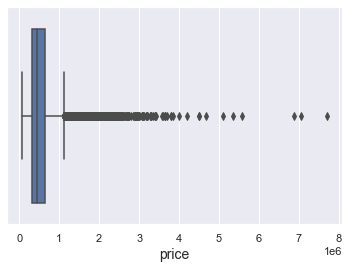

In [96]:
sns.boxplot(df_ohe['price'])

<AxesSubplot:xlabel='price'>

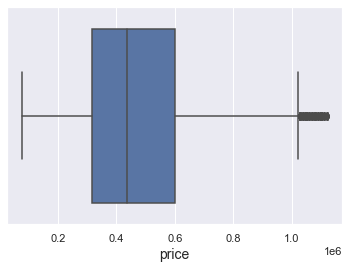

In [97]:
sns.boxplot(test['price'])

> Using IQR dropped more numbers than using the z-score. 

- Used same code and when back to only drop price.

> **Deep Thoughts**:
I don't think I want to drop outliers for every column? The only outlier that I think I really need to be concerned with is price. Went back through IQR and dropped only price.

In [98]:
df_ohe.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,sqft_living15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199
count,2.135700e+04,21357.000000,21357.000000,2.135700e+04,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000,21357.000000
mean,5.404997e+05,3.373788,2.118322,1.511924e+04,1.496020,0.006789,0.234677,7.662312,1971.095894,69.066723,47.560285,1988.066255,0.009224,0.014702,0.007866,0.022896,0.006508,0.013251,0.004635,0.010863,0.022850,0.003652,0.019104,0.014983,0.020181,0.025425,0.027298,0.002294,0.013064,0.010207,0.026689,0.018682,0.018776,0.021773,0.014234,0.012642,0.020321,0.016763,0.004870,0.028047,0.010722,0.015452,0.012361,0.008662,0.005104,0.012502,0.026830,0.015311,0.025659,0.023224,0.008615,0.013485,0.018729,0.016435,0.022616,0.012174,0.015826,0.013110,0.012314,0.011846,0.014749
std,3.666157e+05,0.925514,0.768334,4.149855e+04,0.540206,0.082119,0.766459,1.171407,29.387983,364.832709,0.138566,685.428458,0.095601,0.120362,0.088345,0.149577,0.080414,0.114350,0.067928,0.103660,0.149428,0.060324,0.136893,0.121489,0.140621,0.157416,0.162954,0.047845,0.113550,0.100517,0.161177,0.135404,0.135736,0.145944,0.118458,0.111727,0.141100,0.128384,0.069614,0.165111,0.102995,0.123343,0.110495,0.092669,0.071259,0.111113,0.161589,0.122790,0.158120,0.150619,0.092421,0.115342,0.135570,0.127144,0.148678,0.109665,0.124806,0.113751,0.110288,0.108196,0.120550
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,1900.000000,0.000000,47.155900,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1952.000000,0.000000,47.471300,1490.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,7.613000e+03,1.500000,0.000000,0.000000,7.000000,1975.000000,0.000000,47.572200,1840.000000,0.000000,0.00

In [99]:
test.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,sqft_living15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98168,zipcode_98177,zipcode_98199
count,2.021100e+04,20211.000000,20211.000000,2.021100e+04,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.00000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000,20211.000000
mean,4.769666e+05,3.331503,2.054525,1.460951e+04,1.477488,0.002523,0.173025,7.535500,1970.906091,61.316808,47.557075,1923.657365,0.009747,0.007570,0.007521,0.019692,0.006680,0.013161,0.004898,0.011479,0.024046,0.003513,0.019346,0.015437,0.018109,0.025926,0.028697,0.000247,0.008065,0.010687,0.027658,0.018604,0.019692,0.022216,0.014794,0.012963,0.020583,0.016278,0.004354,0.028945,0.008807,0.016328,0.012864,0.009153,0.004255,0.008213,0.027114,0.015388,0.026619,0.024244,0.007570,0.01331,0.019395,0.017367,0.023898,0.012567,0.015586,0.013606,0.013013,0.011330,0.013409
std,2.079344e+05,0.907414,0.709815,4.010265e+04,0.537268,0.050171,0.641387,1.035091,29.172277,344.410476,0.141060,615.299758,0.098248,0.086679,0.086397,0.138944,0.081457,0.113967,0.069818,0.106526,0.153197,0.059167,0.137741,0.123287,0.133349,0.158920,0.166958,0.015727,0.089444,0.102828,0.163996,0.135124,0.138944,0.147388,0.120730,0.113119,0.141987,0.126547,0.065843,0.167655,0.093434,0.126736,0.112692,0.095237,0.065094,0.090257,0.162419,0.123092,0.160972,0.153810,0.086679,0.11460,0.137914,0.130637,0.152735,0.111401,0.123869,0.115853,0.113331,0.105843,0.115019
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,1900.000000,0.000000,47.155900,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,5.000000e+03,1.000000,0.000000,0.000000,7.000000,1952.000000,0.000000,47.460650,1470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000e+05,3.000000,2.000000,7.500000e+03,1.000000,0.000000,0.000000,7.000000,1975.000000,0.000000,47.567100,1800.000000,0.000000,0.000000,

Choosing to drop outliers on bedroom, since there is one with 30 bedrooms. 

In [100]:
#drop bedroom outliers
Q1 = test['bedrooms'].quantile(0.25)
Q3 = test['bedrooms'].quantile(0.75)
IQR = Q3-Q1
print(IQR)
    
test = test[~((test['bedrooms'] < (Q1 - 1.5 * IQR)) |(test['bedrooms'] > (Q3 + 1.5 * IQR)))]
test.shape

1.0


(19757, 61)

In [101]:
#drop sqft_lot outliers
Q1 = test['sqft_lot'].quantile(0.25)
Q3 = test['sqft_lot'].quantile(0.75)
IQR = Q3-Q1
print(IQR)
    
test = test[~((test['sqft_lot'] < (Q1 - 1.5 * IQR)) |(test['sqft_lot'] > (Q3 + 1.5 * IQR)))]
test.shape

5300.0


(17603, 61)

# Model

### R-squared Modeling

> Originally only dropped price outliers to see what difference it made. Went back and added bedrooms as well.

In [102]:
features = '+'.join(test.drop(columns= 'price').columns)
features

'bedrooms+bathrooms+sqft_lot+floors+waterfront+view+grade+yr_built+yr_renovated+lat+sqft_living15+zipcode_98002+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98029+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98056+zipcode_98059+zipcode_98065+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98168+zipcode_98177+zipcode_98199'

In [103]:
formula = target + '~' + features
model = smf.ols(formula, test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1227.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:40:24   Log-Likelihood:            -2.2566e+05
No. Observations:               17603   AIC:                         4.514e+05
Df Residuals:                   17542   BIC:                         4.519e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.243e+07   4.03e+05    -30.800      0.000   -1.32e+07   -1.16e+07
bedrooms       1.911e+04   1045.295     18.282      0.000    1.71e+04    2.12e+04
bathrooms      4.478e+04   1548.396     28.920      0.000    4.17e+04    4.78e+04
sqft_lot          3.2604      0.278     11.731      0.000       2.716       3.805
floors         5673.7767   1802.835      3.147      0.002    2140.042    9207.511
waterfront     2.082e+05   1.89e+04     11.009      0.000    1.71e+05    2.45e+05
view           3.372e+04   1241.383     27.164      0.000    3.13e+04    3.62e+04
grade          6.486e+04   1146.694     56.559      0.000    6.26e+04    6.71e+04
yr_built      -1113.2530     38.320    -29.052      0.000   -1188.364   -1038.142
yr_renovated     14.5561      2.102      6.924      0.000      10.436      18.677
lat             2.98e+05   8269.471     36.032      0.000    2.82e+05    3.14e+05
sqft_living15    74.7834      1.833     40.802      0.000      71.191      78.376
zipcode_98002  3.489e+04   6907.778      5.051      0.000    2.13e+04    4.84e+04
zipcode_98004  4.029e+05   7828.409     51.468      0.000    3.88e+05    4.18e+05
zipcode_98005   2.41e+05   8862.723     27.189      0.000    2.24e+05    2.58e+05
zipcode_98006  1.915e+05   5082.995     37.684      0.000    1.82e+05    2.02e+05
zipcode_98007  1.524e+05   8308.164     18.338      0.000    1.36e+05    1.69e+05
zipcode_98008  1.437e+05   5954.438     24.140      0.000    1.32e+05    1.55e+05
zipcode_98010  1.037e+05   1.35e+04      7.677      0.000    7.72e+04     1.3e+05
zipcode_98022  4.832e+04   7980.654      6.054      0.000    3.27e+04     6.4e+04
zipcode_98023 -1.956e+04   4634.918     -4.220      0.000   -2.86e+04   -1.05e+04
zipcode_98024  7.079e+04   1.76e+04      4.013      0.000    3.62e+04    1.05e+05
zipcode_98027   1.57e+05   5916.947     26.539      0.000    1.45e+05    1.69e+05
zipcode_98029  1.523e+05   5524.003     27.573      0.000    1.41e+05    1.63e+05
zipcode_98033  2.085e+05   5310.634     39.263      0.000    1.98e+05    2.19e+05
zipcode_98034  6.164e+04   4693.946     13.133      0.000    5.24e+04    7.08e+04
zipcode_98038  3.028e+04   4434.702      6.828      0.000    2.16e+04     3.9e+04
zipcode_98039  4.954e+05   4.01e+04     12.359      0.000    4.17e+05    5.74e+05
zipcode_98040  3.321e+05   7656.207     43.374      0.000    3.17e+05    3.47e+05
zipcode_98045  5.056e+04   7744.519      6.529      0.000    3.54e+04    6.57e+04
zipcode_98052  1.464e+05   4578.651     31.964      0.000    1.37e+05    1.55e+05
zipcode_98053  1.798e+05   6368.443     28.230      0.000    1.67e+05    1.92e+05
zipcode_98056  6.352e+04   4845.985     13.107      0.000     5.4e+04     7.3e+04
zipcode_98059  5.993e+04   4806.074     12.470      0.000    5.05e+04    6.94e+04
zipcode_98065  8.598e+04   5726.737     15.014   

> **Dropping Price Outliers**:
- multicollinearity dropped to 2.43e+07
- R2 value rose to .796
- P-values - floor rose and zipcode_98168

>**Removing Bedrooms Outliers**:
- multi = 2.41e+06
- R2 .798
- P-values - floors and zipcode still

> **Removing Sqft_lot Outliers**:
- multi = 5.00e+6
- R2 = .807
- p-values = cleaned from below coding

> **Sqft_living15 Outliers**:
- Tried and it made numbers worse. Did not save outlier removal.

### Answer to Question:

**Question**: Does removing outliers impact my model?

> Answer: When I first removed all the outliers in the dataset I was left with hardly anything to work with. (about 4000 rows) When I went back and only removed the outliers for price my R2 value rose and my multicollinearity dropped. This shows that removing outliers do have an impact on models and it is in the hands of the data scientist to make the correct choices.

In [104]:
p_val_removal(test)

In [105]:
features = '+'.join(test.drop(columns= 'price').columns)
features

'bedrooms+bathrooms+sqft_lot+floors+waterfront+view+grade+yr_built+yr_renovated+lat+sqft_living15+zipcode_98002+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98029+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98056+zipcode_98059+zipcode_98065+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98177+zipcode_98199'

In [106]:
formula = target + '~' + features
model = smf.ols(formula, test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1248.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:40:25   Log-Likelihood:            -2.2566e+05
No. Observations:               17603   AIC:                         4.514e+05
Df Residuals:                   17543   BIC:                         4.519e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.243e+07   4.03e+05    -30.801      0.000   -1.32e+07   -1.16e+07
bedrooms       1.911e+04   1045.247     18.283      0.000    1.71e+04    2.12e+04
bathrooms      4.478e+04   1548.183     28.926      0.000    4.17e+04    4.78e+04
sqft_lot          3.2601      0.278     11.731      0.000       2.715       3.805
floors         5667.4020   1801.806      3.145      0.002    2135.684    9199.120
waterfront     2.082e+05   1.89e+04     11.012      0.000    1.71e+05    2.45e+05
view           3.372e+04   1241.348     27.165      0.000    3.13e+04    3.62e+04
grade          6.486e+04   1146.092     56.592      0.000    6.26e+04    6.71e+04
yr_built      -1113.0328     38.264    -29.088      0.000   -1188.034   -1038.032
yr_renovated     14.5584      2.102      6.926      0.000      10.438      18.679
lat             2.98e+05   8268.655     36.034      0.000    2.82e+05    3.14e+05
sqft_living15    74.7902      1.832     40.831      0.000      71.200      78.380
zipcode_98002  3.493e+04   6899.104      5.062      0.000    2.14e+04    4.84e+04
zipcode_98004  4.029e+05   7822.473     51.511      0.000    3.88e+05    4.18e+05
zipcode_98005   2.41e+05   8858.479     27.205      0.000    2.24e+05    2.58e+05
zipcode_98006  1.916e+05   5077.728     37.728      0.000    1.82e+05    2.02e+05
zipcode_98007  1.524e+05   8302.926     18.354      0.000    1.36e+05    1.69e+05
zipcode_98008  1.438e+05   5946.342     24.178      0.000    1.32e+05    1.55e+05
zipcode_98010  1.037e+05   1.35e+04      7.683      0.000    7.72e+04     1.3e+05
zipcode_98022  4.835e+04   7974.608      6.063      0.000    3.27e+04     6.4e+04
zipcode_98023 -1.953e+04   4627.684     -4.220      0.000   -2.86e+04   -1.05e+04
zipcode_98024  7.083e+04   1.76e+04      4.016      0.000    3.63e+04    1.05e+05
zipcode_98027  1.571e+05   5912.324     26.564      0.000    1.45e+05    1.69e+05
zipcode_98029  1.523e+05   5519.610     27.599      0.000    1.42e+05    1.63e+05
zipcode_98033  2.085e+05   5302.538     39.329      0.000    1.98e+05    2.19e+05
zipcode_98034  6.168e+04   4683.586     13.169      0.000    5.25e+04    7.09e+04
zipcode_98038   3.03e+04   4428.587      6.843      0.000    2.16e+04     3.9e+04
zipcode_98039  4.954e+05   4.01e+04     12.360      0.000    4.17e+05    5.74e+05
zipcode_98040  3.321e+05   7652.094     43.400      0.000    3.17e+05    3.47e+05
zipcode_98045  5.059e+04   7738.681      6.538      0.000    3.54e+04    6.58e+04
zipcode_98052  1.464e+05   4571.969     32.017      0.000    1.37e+05    1.55e+05
zipcode_98053  1.798e+05   6364.291     28.252      0.000    1.67e+05    1.92e+05
zipcode_98056  6.355e+04   4836.790     13.139      0.000    5.41e+04     7.3e+04
zipcode_98059  5.996e+04   4800.327     12.490      0.000    5.05e+04    6.94e+04
zipcode_98065    8.6e+04   5723.253     15.027   

> **Observations**:
- R2 stayed the same
- Pvalues taken care of
- Multicollinearity dropped to 2.41e+07

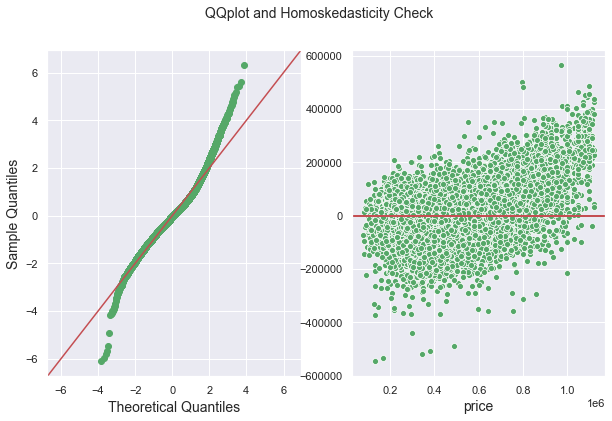

In [107]:
create_visuals(test[target])

In [108]:
X = test.drop('price', axis=1)
X = sm.add_constant(X)
X.shape

(17603, 60)

In [109]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [110]:
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results

const            357694.896535
bedrooms              1.501835
bathrooms             2.496492
sqft_lot              2.019094
floors                2.115652
waterfront            1.069668
view                  1.205344
grade                 2.715314
yr_built              2.856485
yr_renovated          1.092754
lat                   2.877037
sqft_living15         2.532061
zipcode_98002         1.081783
zipcode_98004         1.053319
zipcode_98005         1.041728
zipcode_98006         1.113310
zipcode_98007         1.042562
zipcode_98008         1.087747
zipcode_98010         1.020870
zipcode_98022         1.118123
zipcode_98023         1.187391
zipcode_98024         1.007858
zipcode_98027         1.071097
zipcode_98029         1.117758
zipcode_98033         1.173617
zipcode_98034         1.325022
zipcode_98038         1.163869
zipcode_98039         1.002402
zipcode_98040         1.058270
zipcode_98045         1.030875
zipcode_98052         1.272463
zipcode_98053         1.172280
zipcode_

In [111]:
threshold = 6
bad_vif2 = list(vif_results[vif_results>threshold].index)
if 'const' in bad_vif2:
    bad_vif2.remove('const') 
bad_vif2

[]

In [112]:
test.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,yr_built,yr_renovated,lat,sqft_living15,zipcode_98002,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98029,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98056,zipcode_98059,zipcode_98065,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98199
count,1.760300e+04,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000,17603.000000
mean,4.669210e+05,3.296597,2.027282,7202.689314,1.479975,0.001363,0.153269,7.484974,1970.703744,58.065443,47.560112,1870.414248,0.010453,0.007896,0.006079,0.020053,0.006931,0.014202,0.002556,0.008067,0.025905,0.001477,0.014145,0.016986,0.019372,0.028291,0.027779,0.000284,0.008294,0.007896,0.028518,0.013350,0.021133,0.021928,0.015622,0.007840,0.020621,0.014032,0.004829,0.031983,0.009487,0.017724,0.014316,0.009998,0.004715,0.009203,0.030393,0.017270,0.029313,0.026359,0.008521,0.014486,0.021360,0.019031,0.026530,0.013861,0.017156,0.014373,0.011362,0.014997
std,2.037026e+05,0.790972,0.688512,3449.354064,0.544607,0.036900,0.596665,0.969972,29.798585,335.501128,0.138391,586.071315,0.101706,0.088513,0.077730,0.140187,0.082964,0.118327,0.050497,0.089455,0.158855,0.038405,0.118093,0.129221,0.137831,0.165807,0.164345,0.016852,0.090696,0.088513,0.166452,0.114772,0.143831,0.146453,0.124013,0.088196,0.142118,0.117625,0.069323,0.175960,0.096941,0.131951,0.118792,0.099493,0.068506,0.095492,0.171670,0.130279,0.168688,0.160205,0.091919,0.119487,0.144585,0.136637,0.160708,0.116918,0.129857,0.119024,0.105987,0.121546
min,7.800000e+04,2.000000,0.500000,520.000000,1.000000,0.000000,0.000000,4.000000,1900.000000,0.000000,47.155900,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000e+05,3.000000,1.500000,4802.000000,1.000000,0.000000,0.000000,7.000000,1951.000000,0.000000,47.472900,1450.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.260000e+05,3.000000,2.000000,7191.000000,1.000000,0.000000,0.000000,7.000000,1973.000000,0.000000,47.569700,1760.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

### Regression Model Validation

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [114]:
df_train, df_test = train_test_split(test)

In [115]:
df_train.shape, df_test.shape

((13202, 60), (4401, 60))

Next do model summary using training summary

In [116]:
features = '+'.join(df_train.drop(columns= 'price').columns)
features

'bedrooms+bathrooms+sqft_lot+floors+waterfront+view+grade+yr_built+yr_renovated+lat+sqft_living15+zipcode_98002+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98029+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98056+zipcode_98059+zipcode_98065+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98177+zipcode_98199'

In [117]:
formula = target + '~' + features
model = smf.ols(formula, df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     936.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:40:34   Log-Likelihood:            -1.6923e+05
No. Observations:               13202   AIC:                         3.386e+05
Df Residuals:                   13142   BIC:                         3.390e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.261e+07   4.64e+05    -27.162      0.000   -1.35e+07   -1.17e+07
bedrooms       1.884e+04   1207.642     15.601      0.000    1.65e+04    2.12e+04
bathrooms      4.204e+04   1785.047     23.551      0.000    3.85e+04    4.55e+04
sqft_lot          3.1752      0.322      9.853      0.000       2.544       3.807
floors         4748.9484   2082.893      2.280      0.023     666.177    8831.719
waterfront     2.063e+05   2.18e+04      9.445      0.000    1.63e+05    2.49e+05
view           3.478e+04   1452.820     23.940      0.000    3.19e+04    3.76e+04
grade          6.437e+04   1319.298     48.793      0.000    6.18e+04     6.7e+04
yr_built      -1089.3784     44.195    -24.649      0.000   -1176.008   -1002.749
yr_renovated     16.4037      2.429      6.752      0.000      11.642      21.166
lat            3.009e+05   9516.115     31.625      0.000    2.82e+05     3.2e+05
sqft_living15    77.0161      2.137     36.044      0.000      72.828      81.204
zipcode_98002  3.932e+04   7986.067      4.924      0.000    2.37e+04     5.5e+04
zipcode_98004  4.031e+05   8954.676     45.014      0.000    3.86e+05    4.21e+05
zipcode_98005  2.299e+05   1.02e+04     22.454      0.000     2.1e+05     2.5e+05
zipcode_98006  1.862e+05   5871.667     31.716      0.000    1.75e+05    1.98e+05
zipcode_98007  1.459e+05   9658.308     15.111      0.000    1.27e+05    1.65e+05
zipcode_98008  1.458e+05   7063.456     20.644      0.000    1.32e+05     1.6e+05
zipcode_98010  8.891e+04    1.6e+04      5.559      0.000    5.76e+04     1.2e+05
zipcode_98022   4.92e+04   9681.536      5.082      0.000    3.02e+04    6.82e+04
zipcode_98023 -1.853e+04   5299.414     -3.496      0.000   -2.89e+04   -8137.727
zipcode_98024  7.484e+04   2.01e+04      3.724      0.000    3.54e+04    1.14e+05
zipcode_98027  1.591e+05   6905.868     23.036      0.000    1.46e+05    1.73e+05
zipcode_98029  1.549e+05   6303.045     24.581      0.000    1.43e+05    1.67e+05
zipcode_98033  2.048e+05   6175.460     33.165      0.000    1.93e+05    2.17e+05
zipcode_98034  5.738e+04   5455.127     10.519      0.000    4.67e+04    6.81e+04
zipcode_98038  3.035e+04   5125.758      5.920      0.000    2.03e+04    4.04e+04
zipcode_98039  4.935e+05   4.01e+04     12.312      0.000    4.15e+05    5.72e+05
zipcode_98040   3.31e+05   8597.843     38.502      0.000    3.14e+05    3.48e+05
zipcode_98045    4.6e+04   8861.852      5.191      0.000    2.86e+04    6.34e+04
zipcode_98052  1.434e+05   5227.809     27.421      0.000    1.33e+05    1.54e+05
zipcode_98053    1.8e+05   7400.037     24.330      0.000    1.66e+05    1.95e+05
zipcode_98056  6.267e+04   5548.760     11.295      0.000    5.18e+04    7.35e+04
zipcode_98059  6.176e+04   5562.135     11.103      0.000    5.09e+04    7.27e+04
zipcode_98065  8.911e+04   6556.719     13.591   

In [118]:
y_train_pred = model.predict(df_train)
y_train_pred

7196     7.726848e+05
13379    1.680805e+05
18331    2.349152e+05
16147    3.917178e+05
16782    2.321966e+05
             ...     
12502    3.042759e+05
17701    5.015256e+05
2980     7.267996e+05
480      5.225708e+05
13894    1.056828e+06
Length: 13202, dtype: float64

In [119]:
y_test_pred = model.predict(df_test)
y_test_pred

124      699240.556745
10812    582414.090478
10804    570449.929656
21392    436401.558566
7698     582500.174501
             ...      
15609    452904.364339
7797     439265.781986
3986     832516.376689
4974     599971.916496
5248     633133.680635
Length: 4401, dtype: float64

In [120]:
r2_train = r2_score(df_train['price'], y_train_pred)
r2_test = r2_score(df_test['price'], y_test_pred)
#want close scores,should be same as models above

print(f"Training Score: {r2_train}")
print(f"Test Score: {r2_test}")

Training Score: 0.8078718685616757
Test Score: 0.8055416475216037


> Numbers should be close to the same.

In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     936.6
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:40:35   Log-Likelihood:            -1.6923e+05
No. Observations:               13202   AIC:                         3.386e+05
Df Residuals:                   13142   BIC:                         3.390e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.261e+07   4.64e+05    -27.162      0.000   -1.35e+07   -1.17e+07
bedrooms       1.884e+04   1207.642     15.601      0.000    1.65e+04    2.12e+04
bathrooms      4.204e+04   1785.047     23.551      0.000    3.85e+04    4.55e+04
sqft_lot          3.1752      0.322      9.853      0.000       2.544       3.807
floors         4748.9484   2082.893      2.280      0.023     666.177    8831.719
waterfront     2.063e+05   2.18e+04      9.445      0.000    1.63e+05    2.49e+05
view           3.478e+04   1452.820     23.940      0.000    3.19e+04    3.76e+04
grade          6.437e+04   1319.298     48.793      0.000    6.18e+04     6.7e+04
yr_built      -1089.3784     44.195    -24.649      0.000   -1176.008   -1002.749
yr_renovated     16.4037      2.429      6.752      0.000      11.642      21.166
lat            3.009e+05   9516.115     31.625      0.000    2.82e+05     3.2e+05
sqft_living15    77.0161      2.137     36.044      0.000      72.828      81.204
zipcode_98002  3.932e+04   7986.067      4.924      0.000    2.37e+04     5.5e+04
zipcode_98004  4.031e+05   8954.676     45.014      0.000    3.86e+05    4.21e+05
zipcode_98005  2.299e+05   1.02e+04     22.454      0.000     2.1e+05     2.5e+05
zipcode_98006  1.862e+05   5871.667     31.716      0.000    1.75e+05    1.98e+05
zipcode_98007  1.459e+05   9658.308     15.111      0.000    1.27e+05    1.65e+05
zipcode_98008  1.458e+05   7063.456     20.644      0.000    1.32e+05     1.6e+05
zipcode_98010  8.891e+04    1.6e+04      5.559      0.000    5.76e+04     1.2e+05
zipcode_98022   4.92e+04   9681.536      5.082      0.000    3.02e+04    6.82e+04
zipcode_98023 -1.853e+04   5299.414     -3.496      0.000   -2.89e+04   -8137.727
zipcode_98024  7.484e+04   2.01e+04      3.724      0.000    3.54e+04    1.14e+05
zipcode_98027  1.591e+05   6905.868     23.036      0.000    1.46e+05    1.73e+05
zipcode_98029  1.549e+05   6303.045     24.581      0.000    1.43e+05    1.67e+05
zipcode_98033  2.048e+05   6175.460     33.165      0.000    1.93e+05    2.17e+05
zipcode_98034  5.738e+04   5455.127     10.519      0.000    4.67e+04    6.81e+04
zipcode_98038  3.035e+04   5125.758      5.920      0.000    2.03e+04    4.04e+04
zipcode_98039  4.935e+05   4.01e+04     12.312      0.000    4.15e+05    5.72e+05
zipcode_98040   3.31e+05   8597.843     38.502      0.000    3.14e+05    3.48e+05
zipcode_98045    4.6e+04   8861.852      5.191      0.000    2.86e+04    6.34e+04
zipcode_98052  1.434e+05   5227.809     27.421      0.000    1.33e+05    1.54e+05
zipcode_98053    1.8e+05   7400.037     24.330      0.000    1.66e+05    1.95e+05
zipcode_98056  6.267e+04   5548.760     11.295      0.000    5.18e+04    7.35e+04
zipcode_98059  6.176e+04   5562.135     11.103      0.000    5.09e+04    7.27e+04
zipcode_98065  8.911e+04   6556.719     13.591   

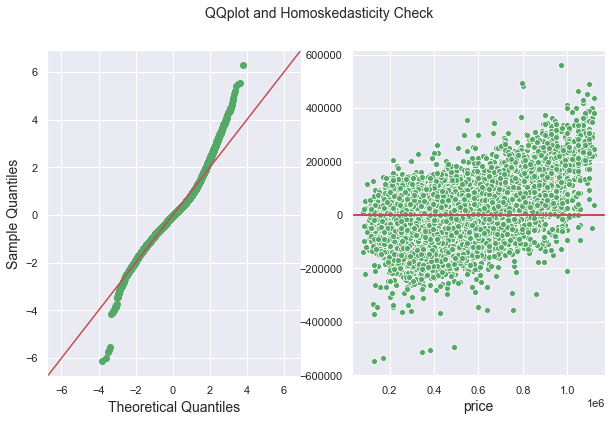

In [122]:
create_visuals(df_train[target])

>**Observations**:
- R2 is the same.
- Test multicollinearity number is slightly lower than mine.

# Interpret

In [123]:
def color_negative(val):
    color = "red" if val < 0 else 'black'
    return 'color: %s' % color

In [124]:
coeffs = model.params.sort_values(ascending=False)
#if you increase by one thats the increase in selling point. 
coeffs.sort_index().to_frame('Coefficients').style.applymap(color_negative)

,Coefficients
Intercept,-12608559.922547
bathrooms,42039.684820
bedrooms,18840.110013
floors,4748.948377
grade,64372.467237
lat,300945.639994
sqft_living15,77.016075
sqft_lot,3.175211
view,34780.969006
waterfront,206281.527285


> Grade = classification of construction by quality which refers to thetypes of materials used and the quality of workmanship.

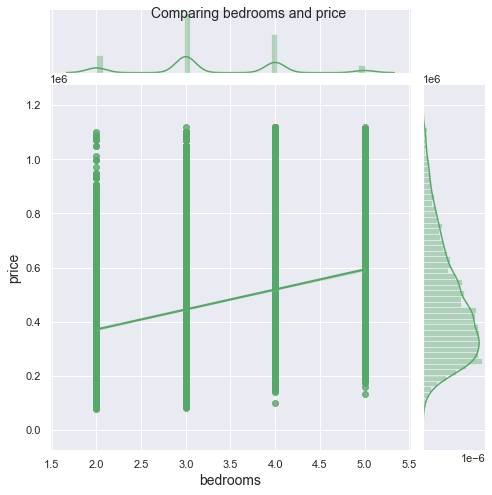

In [125]:
joint_graphs(test, 'bedrooms', target = 'price')

In [126]:
@interact 
def show_plot(col=test):
    joint_graphs(test, col)

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floo…

# Conclusions & Recommendations

Here I will summarize my conclusions and bullet point my list of recommendations which are based on my modeling results.

### top recs?

> - high grade material
> - increase number of bathrooms
> - Waterfront is always a perk
> - Try to have at least 3 viewings of the house before selling.
> - If you are buying always consider location. Take a peak at my tableau.